In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sys
sys.path.append('..')
from dataset import batcher

In [5]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [11]:
# Get test split
# bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SW_IR1', 'SW_IR2', 'TEMP', 'VIIRS']
bands = ['VIIRS']
test_batcher = batcher.Batcher(bands, country_year='malawi-2016', bucket=False, shuffle=False, split='custom', repeat=1, batch_size=3511).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 500, 224, 224, 1)


In [12]:
# Load model
experiments = ['imagery_sample_cnn_regression_NL']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [13]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
    loss=LOSS,
    optimizer=OPT,
    metrics=METRICS,
)

y_preds = trained_model.predict(x_true)
print(y_preds)

 1/16 [>.............................] - ETA: 2s

2023-02-20 13:54:58.390753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 120ms/step
[[-7.0894146 ]
 [-8.279418  ]
 [-8.440289  ]
 [-6.515929  ]
 [-6.0353084 ]
 [-6.3808255 ]
 [-5.4241543 ]
 [-4.272486  ]
 [-8.508389  ]
 [-8.643788  ]
 [-7.6905723 ]
 [-8.815782  ]
 [-8.136078  ]
 [-8.658259  ]
 [-5.330892  ]
 [-0.7337742 ]
 [-8.43908   ]
 [-8.082     ]
 [-5.374089  ]
 [ 0.14860904]
 [-3.8213308 ]
 [-8.55243   ]
 [-7.8622203 ]
 [-8.714961  ]
 [-7.291773  ]
 [-6.8397174 ]
 [-5.7275248 ]
 [-5.861205  ]
 [-6.791858  ]
 [-6.7917056 ]
 [-8.386785  ]
 [-8.43823   ]
 [-8.179157  ]
 [ 0.3051882 ]
 [-8.126673  ]
 [-8.063755  ]
 [-7.914601  ]
 [-0.9330398 ]
 [-8.771354  ]
 [-8.656314  ]
 [-8.61276   ]
 [-8.234664  ]
 [-8.075073  ]
 [-8.063755  ]
 [-6.3892183 ]
 [ 0.761701  ]
 [-6.2171493 ]
 [-8.57245   ]
 [ 3.0831177 ]
 [ 0.37554327]
 [-6.305943  ]
 [-8.162259  ]
 [-8.737594  ]
 [-8.382779  ]
 [-6.8271184 ]
 [-7.1081414 ]
 [-7.6919293 ]
 [-8.3234005 ]
 [ 0.28838342]
 [-8.583186  ]
 [-7.5771894 ]
 [-7.024623  ]
 [-6.536901  ]


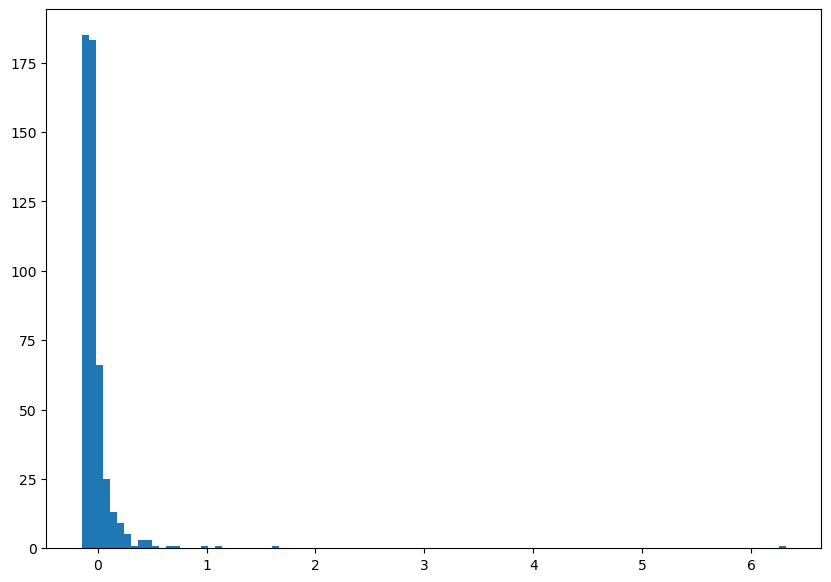

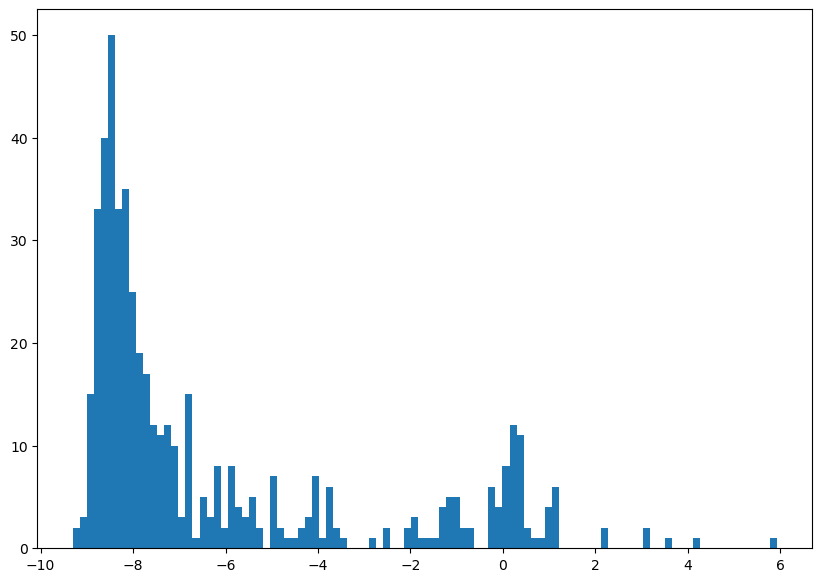

In [14]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()


r2 = pearsonr(y_true, y_preds)[0]

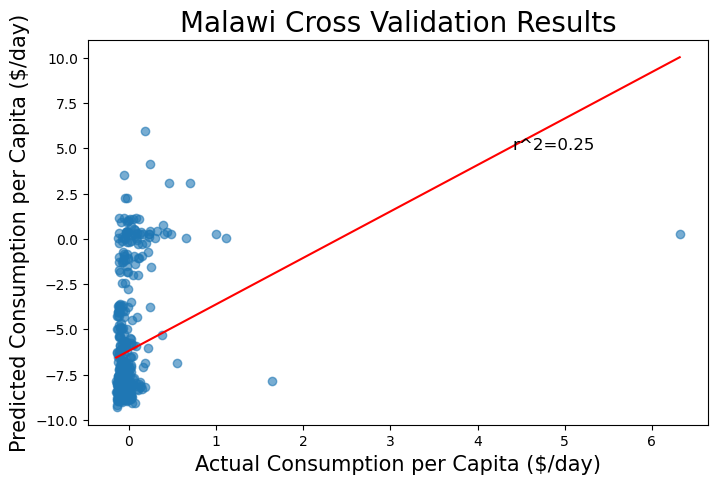

In [15]:
# Plot predictions
country = 'Malawi'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([np.min(y_true), 10])
plt.show()